In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.optim import Adam
from matplotlib import pyplot as plt
from utils import get_mnist_data, get_device
from models import ConvNN, SmoothClassifier
from training_and_evaluation import train_model
from torch.nn.functional import cross_entropy

# Project 2, part 3: Randomized smoothing training (60 pt)
In this notebook we train a smooth classifier via the principle of randomized smoothing.

## Your task
Complete the missing code in the respective files, i.e. `models.py`, and this notebook. Make sure that all the functions follow the provided specification, i.e. the output of the function exactly matches the description in the docstring. 

Specifically, for this part you will have to implement the following functions / classes:  
**`models.py`**:
* `SmoothClassifier`:
 * `certify` (20pt)
 * `predict` (20pt)
 * `_sample_noise_predictions` (20pt)

## General remarks
Do not add or modify any code outside of the following comment blocks, or where otherwise explicitly stated.

``` python
##########################################################
# YOUR CODE HERE
...
##########################################################
```
After you fill in all the missing code, restart the kernel and re-run all the cells in the notebook.

The following things are **NOT** allowed:
- Using additional `import` statements
- Copying / reusing code from other sources (e.g. code by other students)

Note that plagiarising even a single project task will make you ineligible for the bonus this semester.

In [2]:
mnist_trainset = get_mnist_data(train=True)
mnist_testset = get_mnist_data(train=False)
device = get_device()

base_classifier = ConvNN().to(device)

In [3]:
sigma = 1
batch_size = 128
lr = 1e-3
epochs = 1

### Creating a smooth classifier
Implement the `SmoothClassifier` class in `models.py` and follow the docstrings there.

In [4]:
model = SmoothClassifier(base_classifier=base_classifier, num_classes=10, 
                         sigma=sigma)
opt = Adam(model.parameters(), lr=lr)

In [5]:
def loss_function(x, y, model):
    logits = model(x).cpu()
    loss = cross_entropy(logits, y)
    return loss, logits

In [6]:
losses, accuracies = train_model(model, mnist_trainset, batch_size, device,
                                 loss_function=loss_function, optimizer=opt)

  0%|          | 0/469 [00:00<?, ?it/s]

In [7]:
torch.save(model.base_classifier.state_dict(), 
           "models/randomized_smoothing.checkpoint")

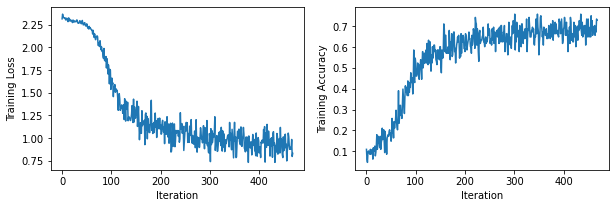

In [9]:
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(accuracies)
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.show()